In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import timeit
import pandas


In [2]:
df = pd.read_excel('data.xlsx', index_col=0) 
df.head()

,bResult,rResult,game_id,minute,League,Year,Season,Type,blueTeamTag,redTeamTag,...,killsredTop,killsredJungle,killsredMiddle,killsredADC,killsredSupport,killsblueTop,killsblueJungle,killsblueMiddle,killsblueADC,killsblueSupport
0,1,0,0,1,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,2,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,3,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,4,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,5,NALCS,2015,Spring,Season,TSM,C9,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#only nummeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df = df.select_dtypes(include=numerics)

In [4]:
#split data into train en test
unique_game_id = df.game_id.unique()
train_game_id , test_game_id= train_test_split(unique_game_id,test_size=0.30, random_state=42)

test_data = df[df.game_id.isin(test_game_id)]
train_data = df[df.game_id.isin(train_game_id)]
xtest = test_data.drop("bResult",axis=1)
xtest = xtest.drop("rResult",axis=1)
ytest = test_data.bResult
xtrain = train_data.drop("bResult",axis=1)
xtrain = xtrain.drop("rResult",axis=1)
ytrain = train_data.bResult


In [6]:
y_test_0_5 = test_data[test_data.minute<6].bResult
x_test_0_5 = test_data[test_data.minute<6]

x_test_0_5 = x_test_0_5.drop("bResult",axis=1)
x_test_0_5 = x_test_0_5.drop("rResult",axis=1)

x_test_0_5 = x_test_0_5.select_dtypes(include=numerics)

In [9]:
ytrain5 = train_data[train_data.minute<6].bResult
xtrain5 = train_data[train_data.minute<6]

xtrain5 = xtrain5.drop("bResult",axis=1)
xtrain5 = xtrain5.drop("rResult",axis=1)

xtrain5 = xtrain5.select_dtypes(include=numerics)

In [12]:
clf = LogisticRegression(random_state=0).fit(xtrain5, ytrain5)
#clf.predict(x_test))

#clf.predict_proba(x_test)

clf.score(x_test_0_5, y_test_0_5)

0.5613298337707786

In [13]:
ytrain10 = train_data[train_data.minute<11][train_data.minute>5].bResult
xtrain10 = train_data[train_data.minute<11][train_data.minute>5]

xtrain10 = xtrain10.drop("bResult",axis=1)
xtrain10 = xtrain10.drop("rResult",axis=1)

xtrain10 = xtrain10.select_dtypes(include=numerics)

C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [14]:
y_test_0_10 = test_data[test_data.minute<11][test_data.minute>5].bResult
x_test_0_10 = test_data[test_data.minute<11][test_data.minute>5]

x_test_0_10 = x_test_0_10.drop("bResult",axis=1)
x_test_0_10 = x_test_0_10.drop("rResult",axis=1)

x_test_0_10 = x_test_0_10.select_dtypes(include=numerics)

C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [17]:
clf = LogisticRegression(random_state=0).fit(xtrain10, ytrain10)


clf.score(x_test_0_10, y_test_0_10)

0.6463692038495188

In [16]:
ytrain15 = train_data[train_data.minute<16][train_data.minute>10].bResult
xtrain15 = train_data[train_data.minute<16][train_data.minute>10]

xtrain15 = xtrain15.drop("bResult",axis=1)
xtrain15 = xtrain15.drop("rResult",axis=1)

xtrain15 = xtrain15.select_dtypes(include=numerics)

C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [19]:
y_test_0_15 = test_data[test_data.minute<16][test_data.minute>9].bResult
x_test_0_15 = test_data[test_data.minute<16][test_data.minute>9]

x_test_0_15 = x_test_0_15.drop("bResult",axis=1)
x_test_0_15 = x_test_0_15.drop("rResult",axis=1)

x_test_0_15 = x_test_0_15.select_dtypes(include=numerics)

C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [131]:
clf = LogisticRegression(random_state=0).fit(xtrain15, ytrain15)
#clf.predict(x_test))

#clf.predict_proba(x_test)

clf.score(x_test_0_15, y_test_0_15)

0.7040682414698163

In [21]:
ytrain20 = train_data[train_data.minute<21][train_data.minute>15].bResult
xtrain20 = train_data[train_data.minute<21][train_data.minute>15]

xtrain20 = xtrain20.drop("bResult",axis=1)
xtrain20 = xtrain20.drop("rResult",axis=1)

xtrain20 = xtrain20.select_dtypes(include=numerics)

C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [22]:
y_test_0_20 = test_data[test_data.minute<21][test_data.minute>15].bResult
x_test_0_20 = test_data[test_data.minute<21][test_data.minute>15]

x_test_0_20 = x_test_0_20.drop("bResult",axis=1)
x_test_0_20 = x_test_0_20.drop("rResult",axis=1)

x_test_0_20 = x_test_0_20.select_dtypes(include=numerics)

C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [23]:
clf = LogisticRegression(random_state=0).fit(xtrain20, ytrain20)
#clf.predict(x_test))

#clf.predict_proba(x_test)

clf.score(x_test_0_20, y_test_0_20)

0.7518158746827689

In [156]:
len(x_test_0_20.columns)

53

In [24]:
ytrain25 = train_data[train_data.minute<26][train_data.minute>20].bResult
xtrain25 = train_data[train_data.minute<26][train_data.minute>20]

xtrain25 = xtrain25.drop("bResult",axis=1)
xtrain25 = xtrain25.drop("rResult",axis=1)

xtrain25 = xtrain25.select_dtypes(include=numerics)

C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [25]:
y_test_0_25 = test_data[test_data.minute<26][test_data.minute>20].bResult
x_test_0_25 = test_data[test_data.minute<26][test_data.minute>20]

x_test_0_25 = x_test_0_25.drop("bResult",axis=1)
x_test_0_25 = x_test_0_25.drop("rResult",axis=1)

x_test_0_25 = x_test_0_25.select_dtypes(include=numerics)

C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\stijn\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [27]:
clf = LogisticRegression(random_state=0).fit(xtrain25, ytrain25)
#clf.predict(x_test))

#clf.predict_proba(x_test)

clf.score(x_test_0_25, y_test_0_25)

0.8016412247419041

In [117]:

c = [0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001,0.00005,0.00001]
cplot = [str(i) for i in c]
len(c)

10

In [106]:
from sklearn.feature_selection import SelectFromModel
accuracy25 = []
features25 = []
for i in range(len(c)):
    sel_ = SelectFromModel(LogisticRegression(C=c[i], penalty='l1'))
    print('done',i+1)
    clf = sel_.fit(xtrain25, ytrain25)
    clf = LogisticRegression(random_state=2).fit(xtrain25.drop(labels=xtrain25.columns[~sel_.get_support()],axis=1), ytrain25)
    clf.score(x_test_0_25.drop(labels=xtrain25.columns[~sel_.get_support()],axis=1), y_test_0_25)
    features25.append(len(xtrain25.columns[sel_.get_support()]))
    accuracy25.append(clf.score(x_test_0_25.drop(labels=xtrain25.columns[~sel_.get_support()],axis=1), y_test_0_25))

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10


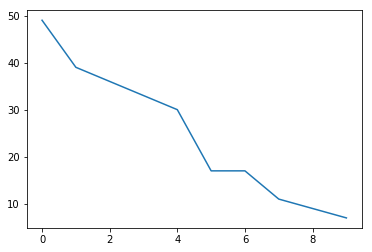

In [108]:
import matplotlib.pyplot as plt

plt.figure()
#plt.plot(accuracy25)
plt.plot(features25)
plt.show()

In [158]:
from sklearn.feature_selection import SelectFromModel
accuracy15 = []
features15 = []
featuresnames15 = []
for i in range(len(c)):
    sel_ = SelectFromModel(LogisticRegression(C=c[i], penalty='l1'))
    print('done',i+1)
    clf = sel_.fit(xtrain15, ytrain15)
    clf = LogisticRegression(random_state=2).fit(xtrain15.drop(labels=xtrain15.columns[~sel_.get_support()],axis=1), ytrain15)
    clf.score(x_test_0_15.drop(labels=xtrain15.columns[~sel_.get_support()],axis=1), y_test_0_15)
    features15.append(len(xtrain15.columns[sel_.get_support()]))
    featuresnames15.append((xtrain15.columns[sel_.get_support()]))
    accuracy15.append(clf.score(x_test_0_15.drop(labels=xtrain15.columns[~sel_.get_support()],axis=1), y_test_0_15))

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10


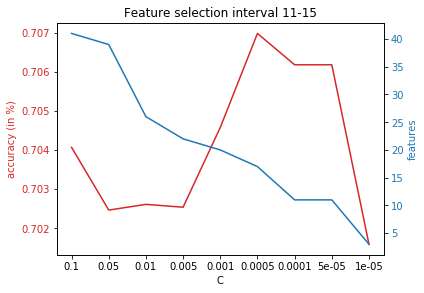

In [151]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('accuracy (in %)', color=color)
ax1.plot(cplot[1:],accuracy15[1:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('features', color=color)  # we already handled the x-label with ax1
ax2.plot(cplot[1:],features15[1:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.title("Feature selection interval 11-15")
plt.show()

In [154]:
accuracy15,cplot,features15

([0.7018081073199184,
  0.7040682414698163,
  0.702464275298921,
  0.702610090405366,
  0.7025371828521435,
  0.7045785943423739,
  0.7069845435987169,
  0.7061825605132692,
  0.7061825605132692,
  0.7015893846602508],
 ['0.5',
  '0.1',
  '0.05',
  '0.01',
  '0.005',
  '0.001',
  '0.0005',
  '0.0001',
  '5e-05',
  '1e-05'],
 [40, 41, 39, 26, 22, 20, 17, 11, 11, 3])

In [91]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(LogisticRegression(C=0.0001, penalty='l1'))
print('done')
clf = sel_.fit(xtrain5, ytrain5)
print('DONE')
print(xtrain5.columns[~sel_.get_support()])
clf = LogisticRegression(random_state=2).fit(xtrain5.drop(labels=xtrain5.columns[~sel_.get_support()],axis=1), ytrain5)
clf.score(x_test_0_5.drop(labels=xtrain25.columns[~sel_.get_support()],axis=1), y_test_0_5)

done
DONE
Index(['game_id', 'minute', 'bKills', 'bTowers', 'bInhibs', 'bDragons',
       'bBarons', 'bHeralds', 'goldred', 'rKills', 'rTowers', 'rInhibs',
       'rDragons', 'rBarons', 'rHeralds', 'goldblueSupport', 'goldredTop',
       'LeagueLB', 'SeasonLB', 'TypeLB', 'blueADCChampLB', 'blueBansLB',
       'killsredTop', 'killsredJungle', 'killsredMiddle', 'killsredADC',
       'killsredSupport', 'killsblueTop', 'killsblueJungle', 'killsblueMiddle',
       'killsblueADC', 'killsblueSupport'],
      dtype='object')


0.5611548556430446

In [124]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(xtrain5, ytrain5)
clf.score(x_test_0_5,y_test_0_5)

0.5625546806649169

In [125]:
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [130]:
len(df.game_id[df.bResult==0].unique())

3474

In [141]:
clf = LogisticRegression(random_state=0).fit(xtrain5, ytrain5)

clf.score(x_test_0_5, y_test_0_5)

0.5613298337707786

In [142]:
clf = LogisticRegression(random_state=0).fit(xtrain10, ytrain10)

clf.score(x_test_0_10, y_test_0_10)

0.6463692038495188

In [140]:
clf = LogisticRegression(random_state=0).fit(xtrain15, ytrain15)

clf.score(x_test_0_15, y_test_0_15)

0.7040682414698163

In [143]:
clf = LogisticRegression(random_state=0).fit(xtrain20, ytrain20)

clf.score(x_test_0_20, y_test_0_20)

0.7518158746827689

In [144]:
clf = LogisticRegression(random_state=0).fit(xtrain25, ytrain25)

clf.score(x_test_0_25, y_test_0_25)

0.8016412247419041

In [139]:

print(clf.score(x_test_0_5, y_test_0_5))
print(clf.score(x_test_0_10, y_test_0_10))
print(clf.score(x_test_0_15, y_test_0_15))
print(clf.score(x_test_0_20, y_test_0_20))
print(clf.score(x_test_0_25, y_test_0_25))

0.5424321959755031
0.6326334208223972
0.6987459900845727
0.7520784107814824
0.7993470396188124


In [145]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
from sklearn.feature_selection import SelectFromModel
accuracy5 = []
features5 = []
featuresnames5 = []
for i in range(len(c)):
    sel_ = SelectFromModel(LogisticRegression(C=c[i], penalty='l1'))
    print('done',i+1)
    clf = sel_.fit(xtrain5, ytrain5)
    clf = LogisticRegression(random_state=0).fit(xtrain5.drop(labels=xtrain25.columns[~sel_.get_support()],axis=1), ytrain5)
    clf.score(x_test_0_5.drop(labels=xtrain5.columns[~sel_.get_support()],axis=1), y_test_0_5)
    features5.append(len(xtrain5.columns[sel_.get_support()]))
    featuresnames5.append((xtrain5.columns[sel_.get_support()]))
    accuracy5.append(clf.score(x_test_0_5.drop(labels=xtrain5.columns[~sel_.get_support()],axis=1), y_test_0_5))

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10


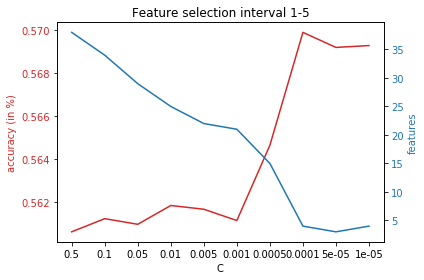

In [174]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('accuracy (in %)', color=color)
ax1.plot(cplot,accuracy5, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('features', color=color)  # we already handled the x-label with ax1
ax2.plot(cplot,features5, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Feature selection interval 1-5")
fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

In [177]:
featuresnames5[7]

Index(['Year', 'golddiff', 'goldredADC', 'redBansLB'], dtype='object')

In [178]:
from sklearn.feature_selection import SelectFromModel
accuracy10 = []
features10 = []
featuresnames10 = []
for i in range(len(c)):
    sel_ = SelectFromModel(LogisticRegression(C=c[i], penalty='l1'))
    print('done',i+1)
    clf = sel_.fit(xtrain10, ytrain10)
    clf = LogisticRegression(random_state=0).fit(xtrain10.drop(labels=xtrain10.columns[~sel_.get_support()],axis=1), ytrain10)
    clf.score(x_test_0_10.drop(labels=xtrain10.columns[~sel_.get_support()],axis=1), y_test_0_10)
    features10.append(len(xtrain10.columns[sel_.get_support()]))
    featuresnames10.append((xtrain10.columns[sel_.get_support()]))
    accuracy10.append(clf.score(x_test_0_10.drop(labels=xtrain10.columns[~sel_.get_support()],axis=1), y_test_0_10))

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10


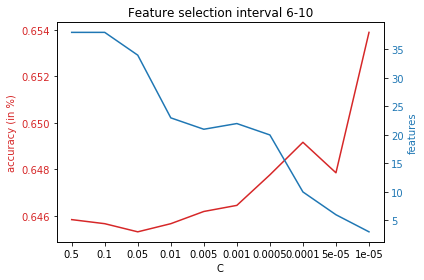

In [179]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('accuracy (in %)', color=color)
ax1.plot(cplot,accuracy10, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('features', color=color)  # we already handled the x-label with ax1
ax2.plot(cplot,features10, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Feature selection interval 6-10")
fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

In [184]:
featuresnames10[9]

Index(['golddiff', 'goldblue', 'redBansLB'], dtype='object')

In [185]:
from sklearn.feature_selection import SelectFromModel
accuracy20 = []
features20 = []
featuresnames20 = []
for i in range(len(c)):
    sel_ = SelectFromModel(LogisticRegression(C=c[i], penalty='l1'))
    print('done',i+1)
    clf = sel_.fit(xtrain20, ytrain20)
    clf = LogisticRegression(random_state=0).fit(xtrain20.drop(labels=xtrain20.columns[~sel_.get_support()],axis=1), ytrain20)
    clf.score(x_test_0_20.drop(labels=xtrain20.columns[~sel_.get_support()],axis=1), y_test_0_20)
    features20.append(len(xtrain20.columns[sel_.get_support()]))
    featuresnames20.append((xtrain20.columns[sel_.get_support()]))
    accuracy20.append(clf.score(x_test_0_20.drop(labels=xtrain20.columns[~sel_.get_support()],axis=1), y_test_0_20))

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10


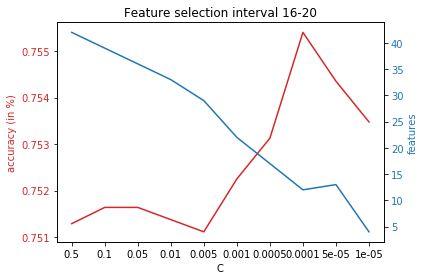

In [186]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('accuracy (in %)', color=color)
ax1.plot(cplot,accuracy20, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('features', color=color)  # we already handled the x-label with ax1
ax2.plot(cplot,features20, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Feature selection interval 16-20")
fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

In [188]:
featuresnames20[7]

Index(['Year', 'golddiff', 'goldblue', 'goldblueJungle', 'goldblueMiddle',
       'goldblueADC', 'goldblueSupport', 'goldredJungle', 'goldredMiddle',
       'goldredADC', 'goldredSupport', 'redBansLB'],
      dtype='object')

In [163]:
from sklearn.feature_selection import SelectFromModel
accuracy25 = []
features25 = []
featuresnames25 = []
for i in range(len(c)):
    sel_ = SelectFromModel(LogisticRegression(C=c[i], penalty='l1'))
    print('done',i+1)
    clf = sel_.fit(xtrain25, ytrain25)
    clf = LogisticRegression(random_state=0).fit(xtrain25.drop(labels=xtrain25.columns[~sel_.get_support()],axis=1), ytrain25)
    clf.score(x_test_0_25.drop(labels=xtrain25.columns[~sel_.get_support()],axis=1), y_test_0_25)
    features25.append(len(xtrain25.columns[sel_.get_support()]))
    featuresnames25.append((xtrain25.columns[sel_.get_support()]))
    accuracy25.append(clf.score(x_test_0_25.drop(labels=xtrain25.columns[~sel_.get_support()],axis=1), y_test_0_25))

done 1
done 2
done 3
done 4
done 5
done 6
done 7
done 8
done 9
done 10


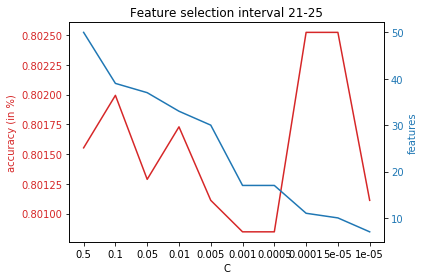

In [165]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('C')
ax1.set_ylabel('accuracy (in %)', color=color)
ax1.plot(cplot,accuracy25, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('features', color=color)  # we already handled the x-label with ax1
ax2.plot(cplot,features25, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title("Feature selection interval 21-25")
fig.tight_layout()# otherwise the right y-label is slightly clipped
plt.show()

In [169]:
featuresnames25[8]

Index(['game_id', 'golddiff', 'goldblueJungle', 'goldblueMiddle',
       'goldblueADC', 'goldredJungle', 'goldredMiddle', 'goldredADC',
       'goldredSupport', 'redBansLB'],
      dtype='object')

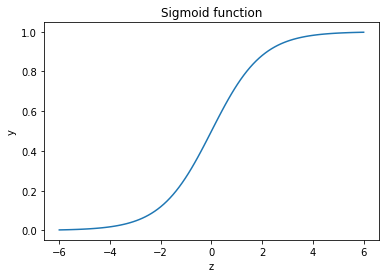

In [146]:
#create sigmoid plot for in report
import matplotlib.pyplot as plt 
import numpy as np 
import math 
  
x = np.linspace(-6, 6, 100) 
z = 1/(1 + np.exp(-x)) 
  
plt.plot(x, z) 
plt.title("Sigmoid function")
plt.xlabel("z") 
plt.ylabel("y") 
  
plt.show() 